# Modelando o Grafo

Executar a célula abaixo para executar as demais.

In [2]:
import pandas as pd
import networkx as nx


# Caminho para o arquivo CSV n
caminho_arquivo = 'dataset/saida.csv'  

# Carregar o CSV para um DataFrame do pandas
df = pd.read_csv(caminho_arquivo)

# Ler nomes das cidades
with open('59 cidades alemãs/nomes.txt', 'r', encoding='utf-8') as nomes_file:
    nomes = [linha.strip() for linha in nomes_file]

# Ler coordenadas das cidades
with open('59 cidades alemãs/coordenadas.txt', 'r') as coordenadas_file:
    coordenadas = [tuple(map(float, linha.strip().split())) for linha in coordenadas_file]

# Criar o dicionário de cidades
cidades = dict(zip(nomes, coordenadas))

# Criar grafo
G = nx.Graph()

# Adicionar nós com as coordenadas específicas
for cidade, coordenada in cidades.items():
    G.add_node(cidade, pos=coordenada)

# Adicionar arestas do dataframe
for index, row in df.iterrows():
    G.add_edge(row['Origem'], row['Destino'], Distancia=row['Distancia'])



# Visualização do grafo 


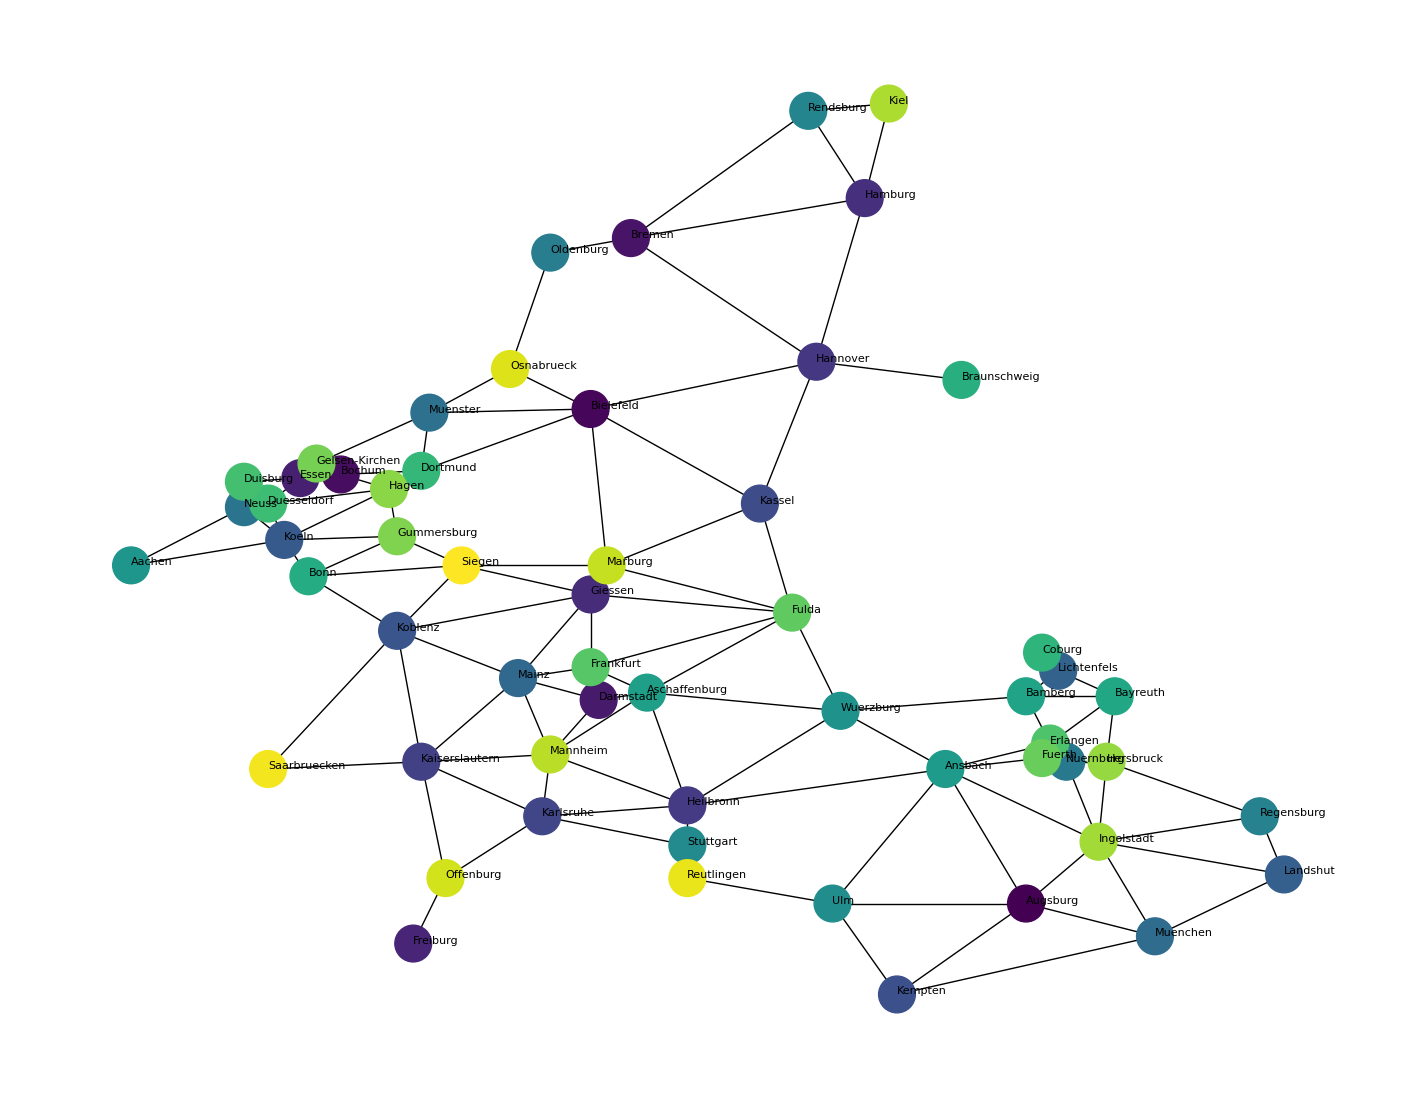

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Criar uma lista de cores para os nós (cores diferentes para cada cidade)
cores = np.arange(len(G.nodes))

# Criar a figura com tamanho específico
plt.figure(figsize=(18, 14))

# Desenhar nós com cores específicas
nx.draw_networkx_nodes(G, pos=nx.get_node_attributes(G, 'pos'), node_size=700, node_color=cores, cmap='viridis')

# Desenhar arestas
nx.draw_networkx_edges(G, pos=nx.get_node_attributes(G, 'pos'), width=1)

# Adicionar rótulos (nomes) para cada cidade
for cidade, coordenada in cidades.items():
    plt.text(coordenada[0], coordenada[1], cidade, fontsize=8)

# Adicionar rótulos aos eixos
plt.xlabel('Coordenada X')
plt.ylabel('Coordenada Y')

plt.axis('off')
plt.show()

# Teste do Djikstra para encontrar menor caminho entre duas cidades quaisquer.

## Selecionar as duas cidades no widget e clicar em calcular

O grafo será plotado com cores diferentes (sem critério).

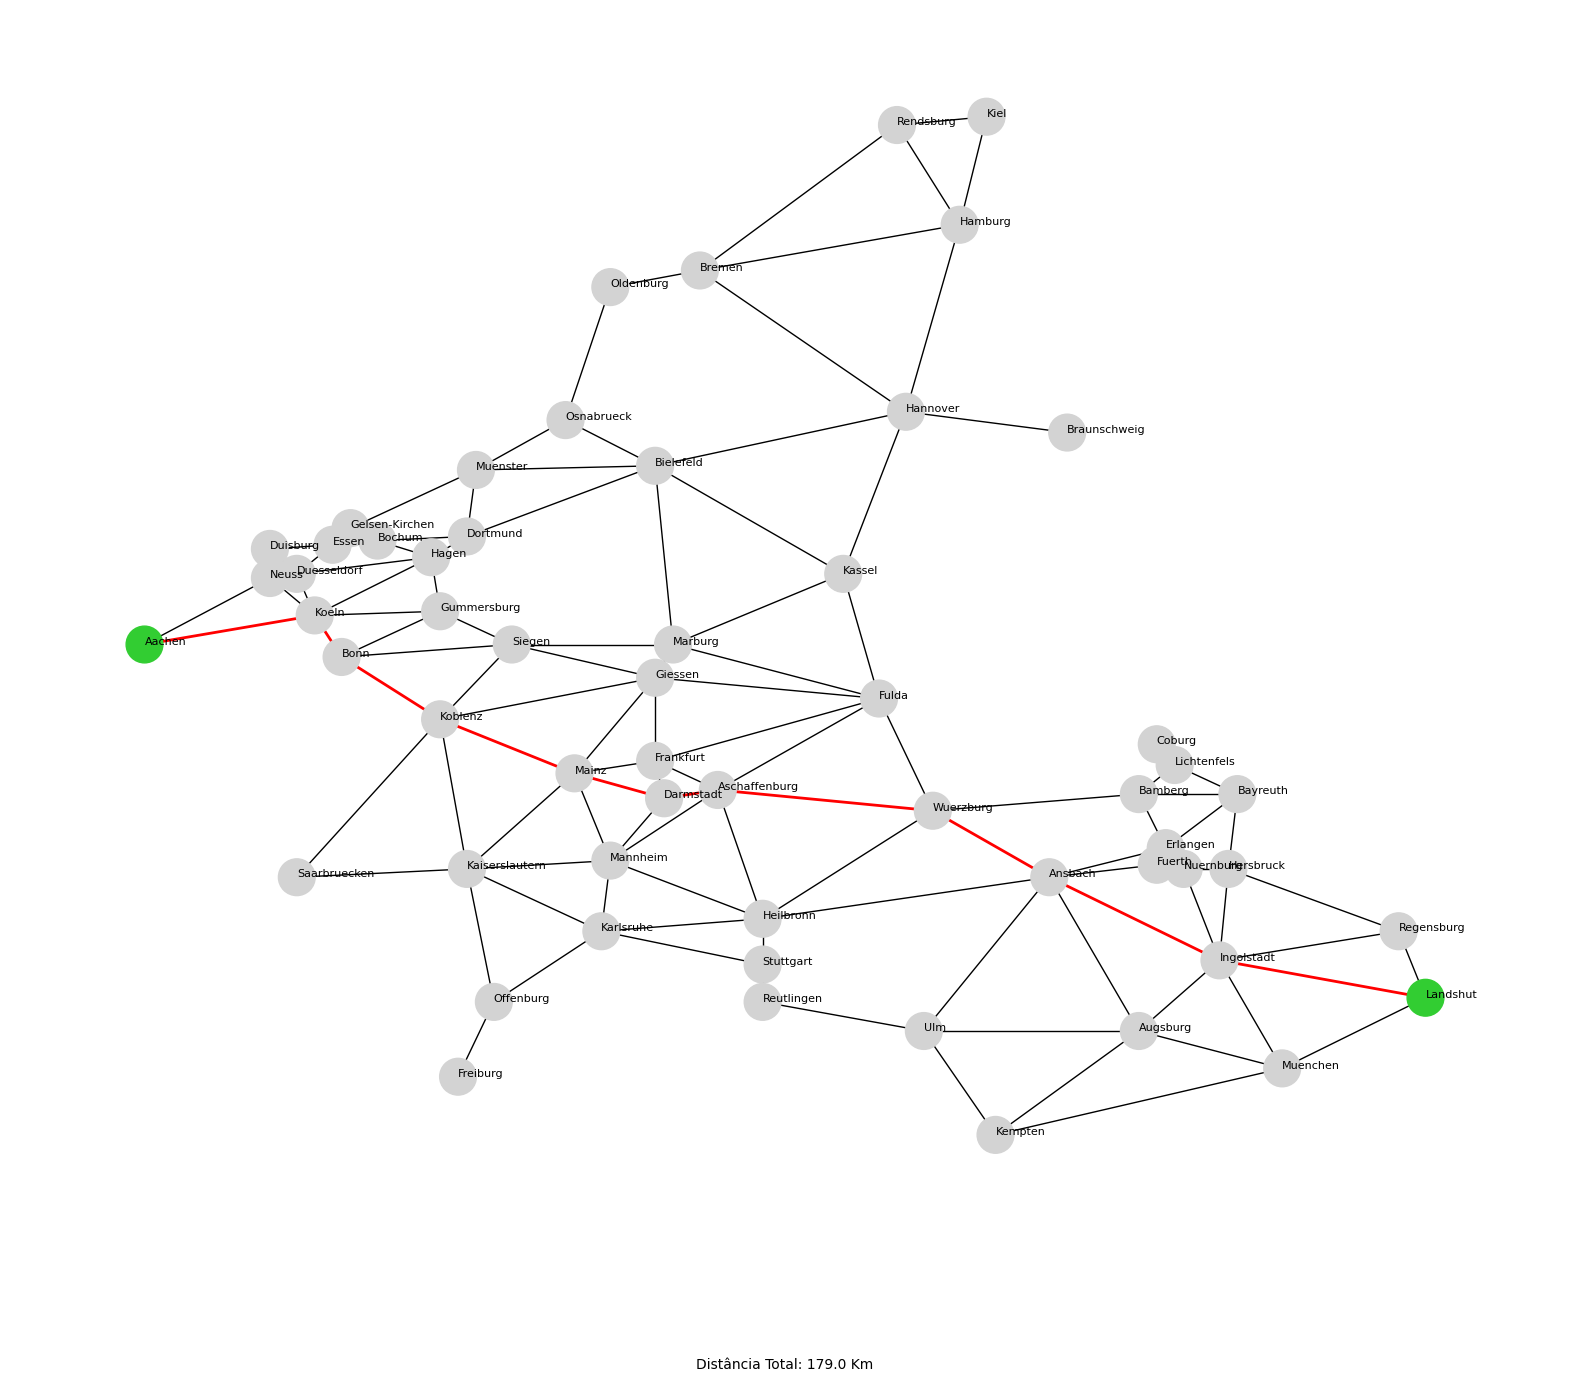

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import ipywidgets as widgets
import numpy as np
from IPython.display import display, clear_output
import heapq

def dijkstra(G, source, target, weight='Distancia'):
    # Inicialização
    dist = {node: float('inf') for node in G.nodes}
    dist[source] = 0
    previous = {node: None for node in G.nodes}
    heap = [(0, source)]  # (distância até o nó, nó)

    while heap:
        current_dist, current_node = heapq.heappop(heap)

        # Se o nó atual já foi visitado, ignore-o
        if current_dist > dist[current_node]:
            continue

        # Relaxamento das arestas
        for neighbor, data in G[current_node].items():
            edge_weight = data.get(weight, 1)  # Peso padrão é 1 se não especificado
            new_dist = dist[current_node] + edge_weight

            if new_dist < dist[neighbor]:
                dist[neighbor] = new_dist
                previous[neighbor] = current_node
                heapq.heappush(heap, (new_dist, neighbor))

    # Reconstruir o caminho
    path = []
    current = target
    while previous[current] is not None:
        path.insert(0, current)
        current = previous[current]
    path.insert(0, source)

    return path, dist[target]

# Widgets de seleção para cidades de origem e destino
cidade_origem_dropdown = widgets.Dropdown(options=nomes, description="Cidade de Origem:")
cidade_destino_dropdown = widgets.Dropdown(options=nomes, description="Cidade de Destino:")

# Botão de cálculo
calcular_button = widgets.Button(description="Calcular")


# Widgets de seleção para cidades de origem e destino
cidade_origem_dropdown = widgets.Dropdown(options=nomes, description="Cidade de Origem:")
cidade_destino_dropdown = widgets.Dropdown(options=nomes, description="Cidade de Destino:")

# Botão de cálculo
calcular_button = widgets.Button(description="Calcular")

# Função para calcular e exibir o menor caminho
def calcular_menor_caminho(b):
    clear_output(wait=True)  # Limpar a saída para evitar sobreposição
    cidade_origem = cidade_origem_dropdown.value
    cidade_destino = cidade_destino_dropdown.value
    
    # Calcular o menor caminho
    menor_caminho, distancia_total = dijkstra(G, source=cidade_origem, target=cidade_destino, weight='Distancia')

    # Criar um novo grafo para destacar o menor caminho
    G_destacado = G.copy()

    # Atribuir cores aos nós
    cores = ['limegreen' if node == cidade_origem or node == cidade_destino else 'lightgrey' for node in G_destacado.nodes]

    # Adicionar arestas do menor caminho
    for i in range(len(menor_caminho) - 1):
        origem = menor_caminho[i]
        destino = menor_caminho[i + 1]
        G_destacado[origem][destino]['cor'] = 'red'

    # Criar a figura com tamanho específico
    plt.figure(figsize=(20, 16))

    # Desenhar nós com cores específicas
    nx.draw_networkx_nodes(G_destacado, pos=nx.get_node_attributes(G, 'pos'), node_size=700, node_color=cores)

    # Desenhar arestas com destaque para o menor caminho
    arestas_destacadas = [(origem, destino) for origem, destino, dados in G_destacado.edges(data=True) if 'cor' in dados]
    arestas_normais = [(origem, destino) for origem, destino in G_destacado.edges() if (origem, destino) not in arestas_destacadas]

    nx.draw_networkx_edges(G_destacado, pos=nx.get_node_attributes(G_destacado, 'pos'), edgelist=arestas_normais, width=1)
    nx.draw_networkx_edges(G_destacado, pos=nx.get_node_attributes(G_destacado, 'pos'), edgelist=arestas_destacadas, width=2, edge_color='red')

    # Adicionar rótulos (nomes) para cada cidade
    for cidade, coordenada in cidades.items():
        plt.text(coordenada[0], coordenada[1], cidade, fontsize=8)

    # Adicionar rótulos aos eixos
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.axis('off')

    plt.text(0.5, -0.1, f'Distância Total: {distancia_total} Km', horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)

    plt.show()

# Associar a função ao botão de cálculo
calcular_button.on_click(calcular_menor_caminho)

# Exibir widgets
display(cidade_origem_dropdown, cidade_destino_dropdown, calcular_button)


# Encontrando as cidades que mais aparecem ao se calcular todos os menores caminhos 


Wuerzburg: 1135 vezes
Ansbach: 902 vezes
Fulda: 814 vezes
Giessen: 697 vezes
Kassel: 634 vezes
Koblenz: 625 vezes
Aschaffenburg: 621 vezes
Mainz: 597 vezes
Siegen: 577 vezes
Gummersburg: 555 vezes
Heilbronn: 508 vezes
Hagen: 503 vezes
Hannover: 488 vezes
Koeln: 474 vezes
Bonn: 471 vezes
Bamberg: 390 vezes
Bielefeld: 388 vezes
Darmstadt: 379 vezes
Fuerth: 374 vezes
Marburg: 356 vezes
Stuttgart: 352 vezes
Osnabrueck: 352 vezes
Nuernburg: 344 vezes
Ingolstadt: 320 vezes
Mannheim: 318 vezes
Kaiserslautern: 314 vezes
Duesseldorf: 310 vezes
Dortmund: 298 vezes
Frankfurt: 297 vezes
Muenster: 280 vezes
Reutlingen: 264 vezes
Hamburg: 262 vezes
Oldenburg: 260 vezes
Ulm: 244 vezes
Bochum: 239 vezes
Karlsruhe: 238 vezes
Hersbruck: 234 vezes
Essen: 230 vezes
Offenburg: 226 vezes
Lichtenfels: 226 vezes
Bremen: 206 vezes
Gelsen-Kirchen: 204 vezes
Erlangen: 188 vezes
Augsburg: 168 vezes
Rendsburg: 146 vezes
Neuss: 143 vezes
Regensburg: 130 vezes
Bayreuth: 126 vezes
Muenchen: 124 vezes
Landshut: 116 ve

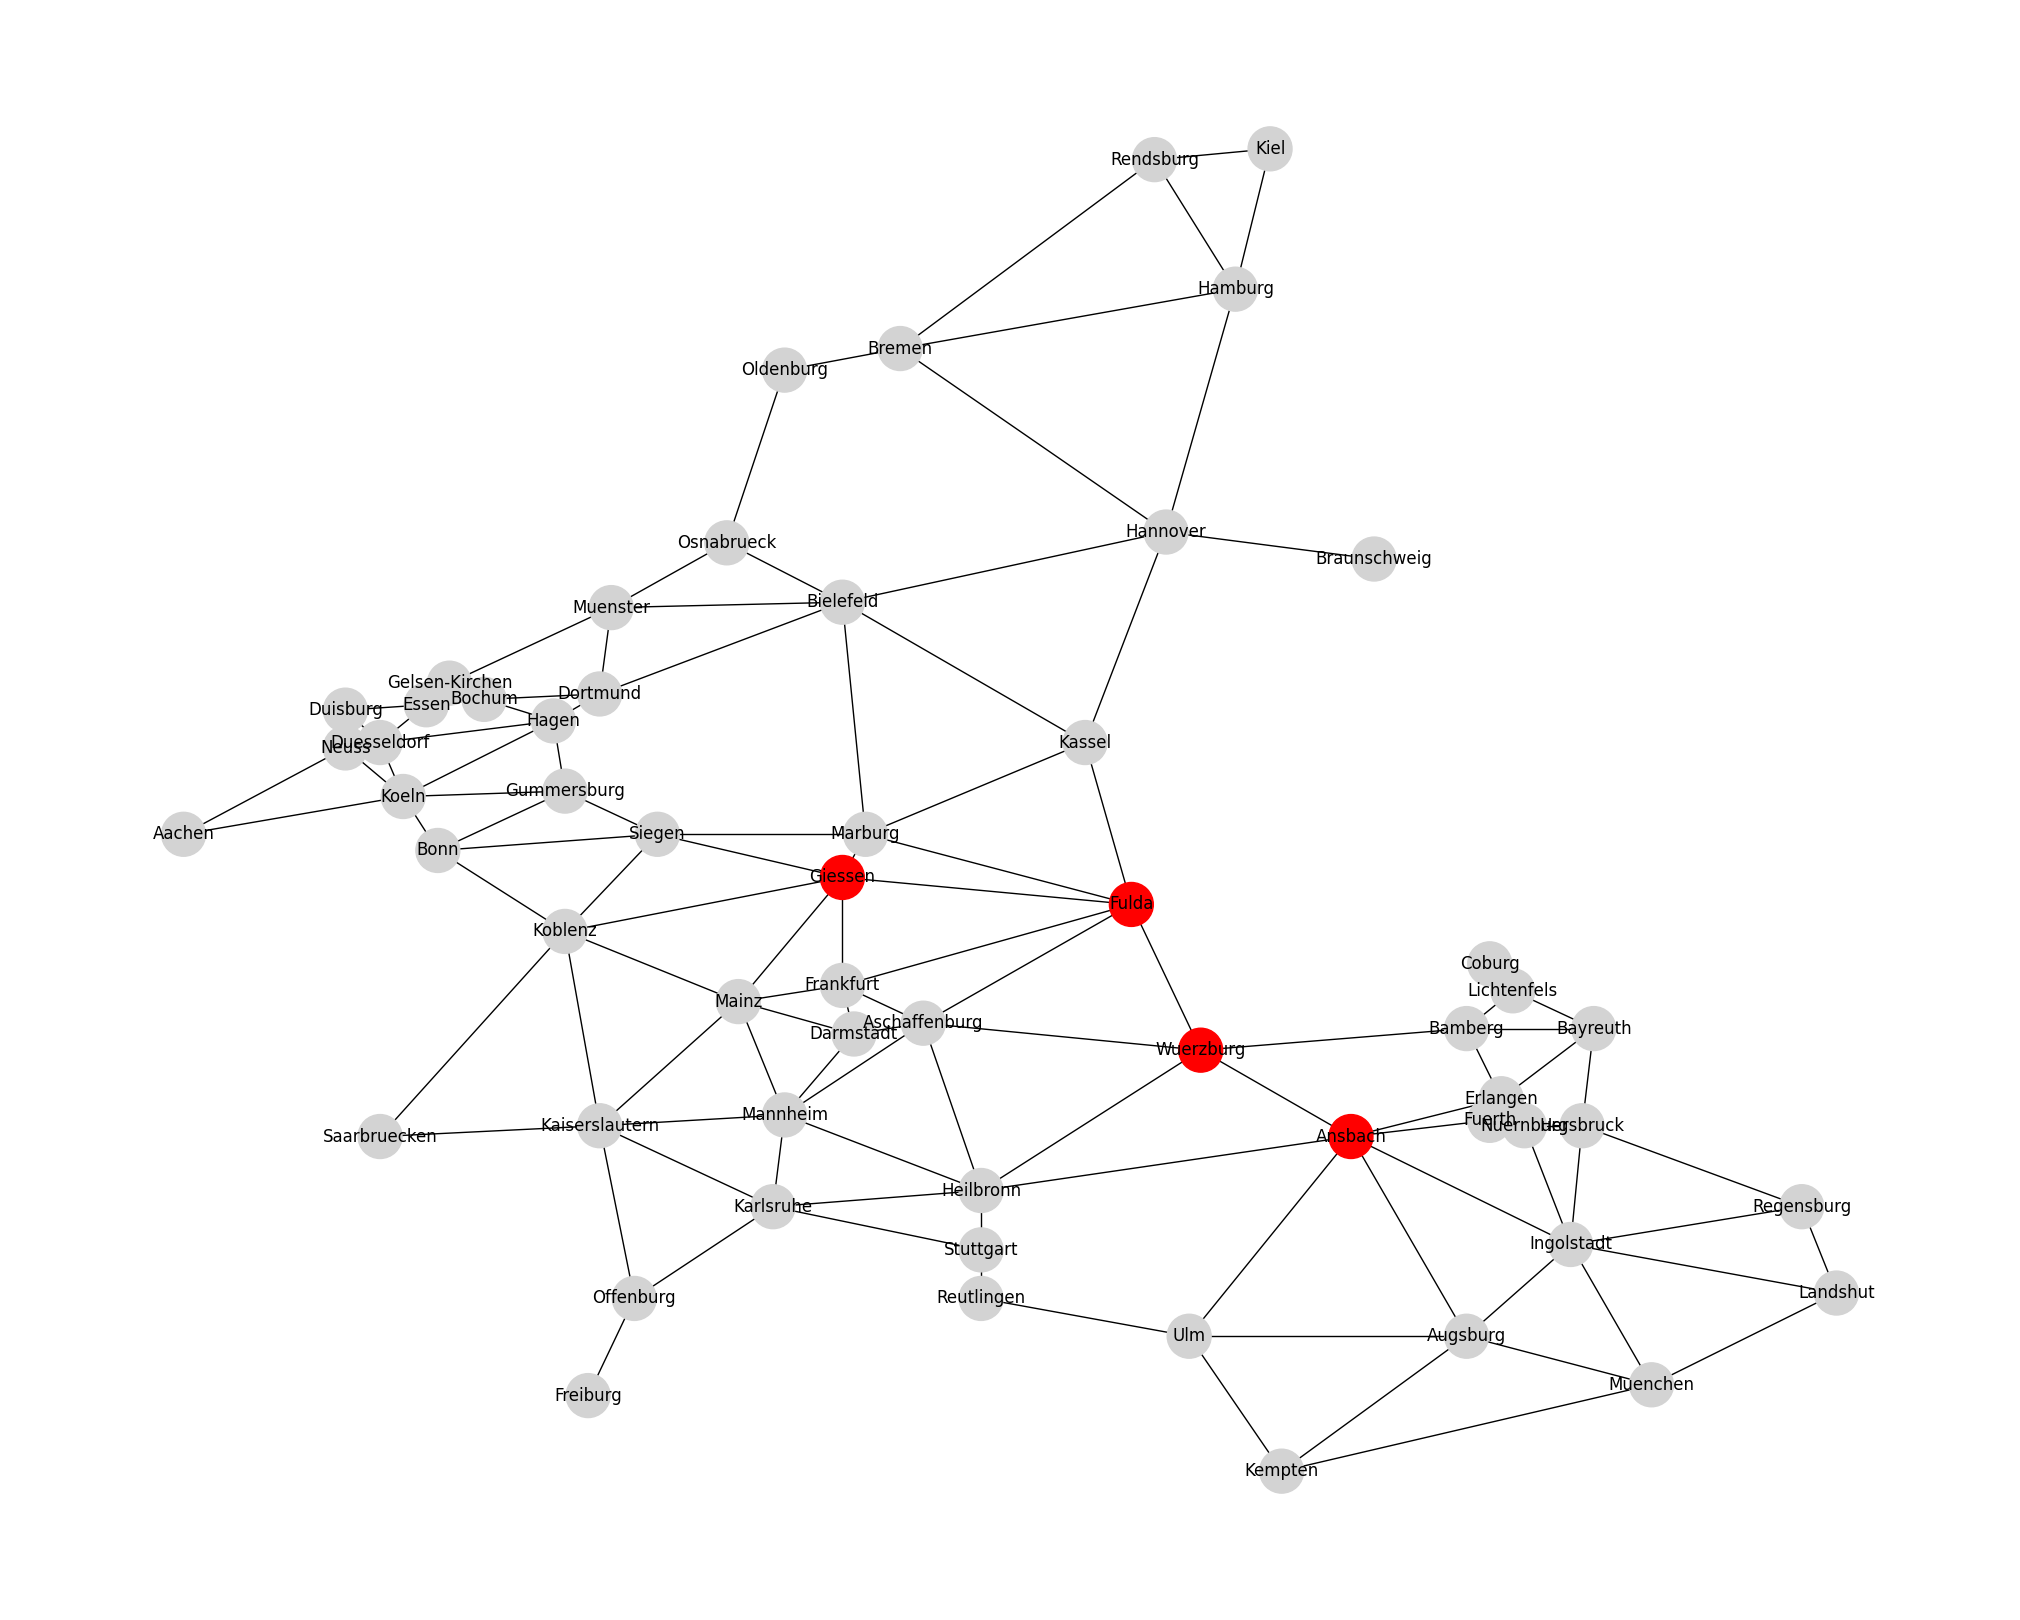

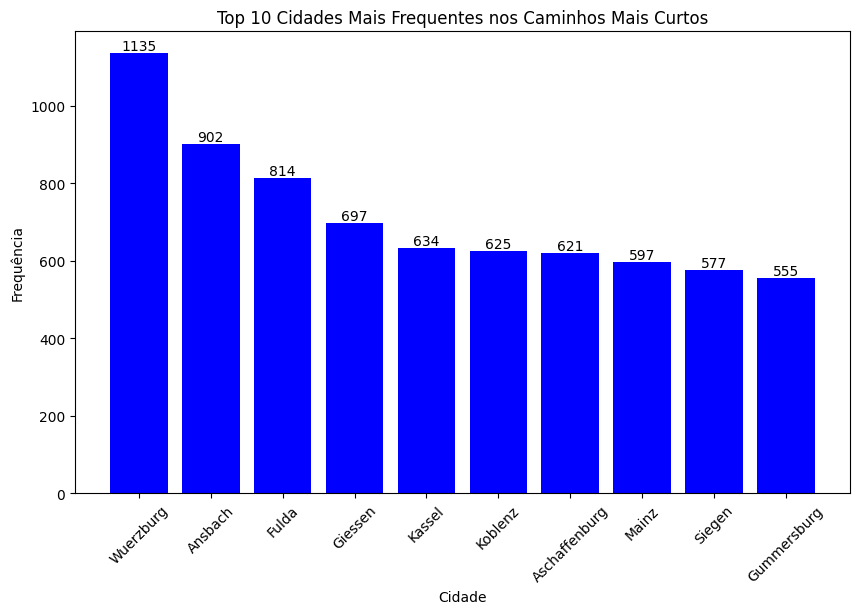

In [6]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
import heapq
import networkx as nx
import matplotlib.pyplot as plt


def dijkstra(G, source, target, weight='Distancia'):
    # Inicialização
    dist = {node: float('inf') for node in G.nodes}
    dist[source] = 0
    previous = {node: None for node in G.nodes}
    heap = [(0, source)]  # (distância até o nó, nó)

    while heap:
        current_dist, current_node = heapq.heappop(heap)

        # Se o nó atual já foi visitado, ignore-o
        if current_dist > dist[current_node]:
            continue

        # Relaxamento das arestas
        for neighbor, data in G[current_node].items():
            edge_weight = data.get(weight, 1)  # Peso padrão é 1 se não especificado
            new_dist = dist[current_node] + edge_weight

            if new_dist < dist[neighbor]:
                dist[neighbor] = new_dist
                previous[neighbor] = current_node
                heapq.heappush(heap, (new_dist, neighbor))

    # Reconstruir o caminho
    path = []
    current = target
    while previous[current] is not None:
        path.insert(0, current)
        current = previous[current]
    path.insert(0, source)

    return path, dist[target]
# Função para calcular as distâncias entre todos os pares de cidades
def calcular_distancias_entre_todos(G):
    todas_as_cidades = list(G.nodes)
    distancias = {}

    for origem, destino in itertools.permutations(todas_as_cidades, 2):
        menor_caminho, distancia_total = dijkstra(G, source=origem, target=destino, weight='Distancia')
        distancias[(origem, destino)] = distancia_total

    return distancias

def mostrar_ranking(distancias):
    cidades_frequentes = {}

    for (origem, destino), distancia in distancias.items():
        menor_caminho, _ = dijkstra(G, source=origem, target=destino, weight='Distancia')
        for cidade in menor_caminho:
            cidades_frequentes[cidade] = cidades_frequentes.get(cidade, 0) + 1

    # Ordenar o ranking
    ranking = sorted(cidades_frequentes.items(), key=lambda x: x[1], reverse=True)

    # Mostrar o ranking
    for cidade, frequencia in ranking:
        print(f'{cidade}: {frequencia} vezes')

    return ranking

# Calcular as distâncias entre todos os pares de cidades
distancias_entre_todos = calcular_distancias_entre_todos(G)

# Mostrar o ranking
ranking = mostrar_ranking(distancias_entre_todos)

# Extrair as 4 cidades mais frequentes
top_10_cidades = ranking[:4]

# Criar um dicionário para mapear as cores dos vértices
cores = ['red' if cidade in [c[0] for c in top_10_cidades] else 'lightgrey' for cidade in G.nodes]

# Obter as posições das cidades
posicoes = nx.get_node_attributes(G, 'pos')

# Plotar o grafo
plt.figure(figsize=(20, 16))
nx.draw(G, pos=posicoes, with_labels=True, node_size=1000, node_color=cores, font_size=12)

# Mostrar o grafo
plt.show()

# Extrair as 10 cidades mais frequentes
top_10_cidades = ranking[:10]

# Plotar o gráfico de barras com valores exatos no eixo y
top_10_cidades_df = pd.DataFrame(top_10_cidades, columns=['Cidade', 'Frequencia'])
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_cidades_df['Cidade'], top_10_cidades_df['Frequencia'], color='blue')
plt.xlabel('Cidade')
plt.ylabel('Frequência')
plt.title('Top 10 Cidades Mais Frequentes nos Caminhos Mais Curtos')
plt.xticks(rotation=45)

# Adicionar os valores exatos no topo de cada barra
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()